# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# !pip install matplotlib

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import os
import os

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_data = []
for city in cities:
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
        city_weather = requests.get(query_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...:")
        # pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,balve,51.3333,7.8667,7.77,97,100,1.35,DE,1731372670
1,vicencia,-7.6569,-35.3267,22.66,79,100,1.58,BR,1731372671
2,olonkinbyen,70.9221,-8.7187,0.56,96,100,9.83,SJ,1731372672
3,yakakent,41.6325,35.5289,12.39,76,74,0.80,TR,1731372673
4,yellowknife,62.4560,-114.3525,-7.55,98,75,8.23,CA,1731372674


In [12]:
# output_dir did not exist.
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balve,51.3333,7.8667,7.77,97,100,1.35,DE,1731372670
1,vicencia,-7.6569,-35.3267,22.66,79,100,1.58,BR,1731372671
2,olonkinbyen,70.9221,-8.7187,0.56,96,100,9.83,SJ,1731372672
3,yakakent,41.6325,35.5289,12.39,76,74,0.80,TR,1731372673
4,yellowknife,62.4560,-114.3525,-7.55,98,75,8.23,CA,1731372674


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

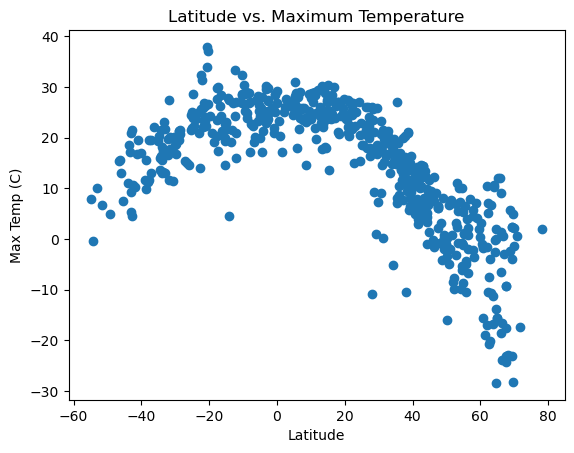

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Maximum Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

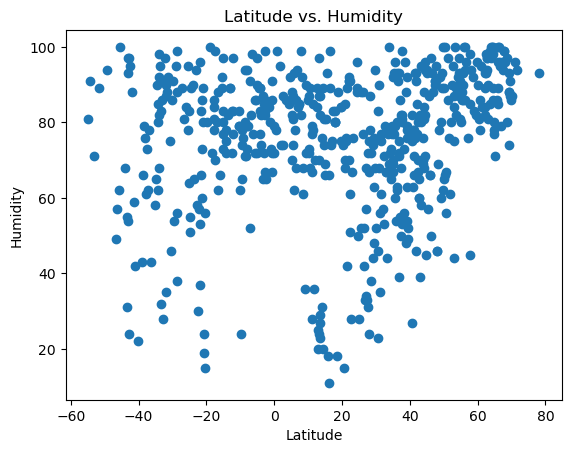

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

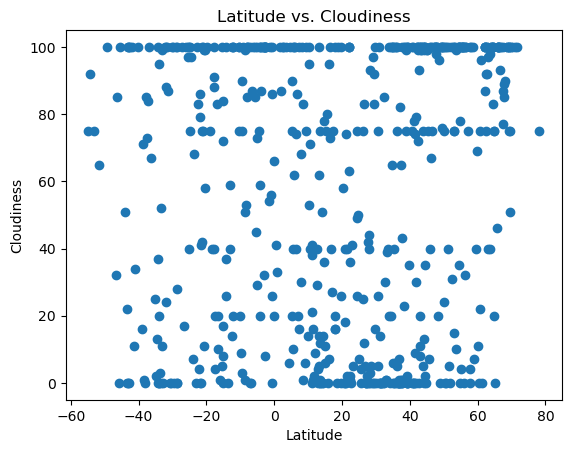

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

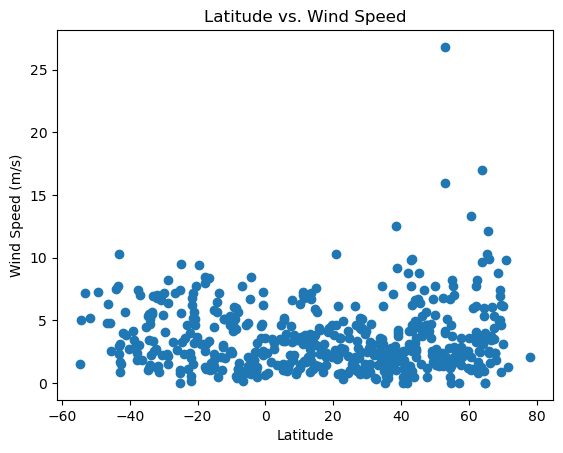

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, ylabel):
    # Reshape the data
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)

    # Calculate linear regression parameters using linregress
    slope, intercept, r_value, p_value, stderr = linregress(x.flatten(), y.flatten())
    r_squared = r_value ** 2

    # Calculate the predicted y values based on the regression line
    y_pred = x.flatten() * slope + intercept
    
    plt.scatter(x, y, color="blue", label="Data Points")
    plt.plot(x, y_pred, color="red", label="Regression Line")

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.annotate(line_eq, (x.min(), y.max()), fontsize=12, color="red")
    
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.legend()

    plt.text(0.00, 1.08, f"The r²-value is {r_squared}", fontsize=12, color="black", transform=plt.gca().transAxes)
    
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balve,51.3333,7.8667,7.77,97,100,1.35,DE,1731372670
2,olonkinbyen,70.9221,-8.7187,0.56,96,100,9.83,SJ,1731372672
3,yakakent,41.6325,35.5289,12.39,76,74,0.80,TR,1731372673
4,yellowknife,62.4560,-114.3525,-7.55,98,75,8.23,CA,1731372674
8,talnakh,69.4865,88.3972,-28.17,91,51,0.85,RU,1731372678


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vicencia,-7.6569,-35.3267,22.66,79,100,1.58,BR,1731372671
5,port mathurin,-19.6833,63.4167,24.25,80,100,9.40,MU,1731372675
6,adamstown,-25.0660,-130.1015,21.82,64,100,1.00,PN,1731372676
7,uturoa,-16.7333,-151.4333,26.27,80,83,8.36,PF,1731372677
9,edinburgh of the seven seas,-37.0676,-12.3116,13.09,78,100,7.03,SH,1731372680


###  Temperature vs. Latitude Linear Regression Plot

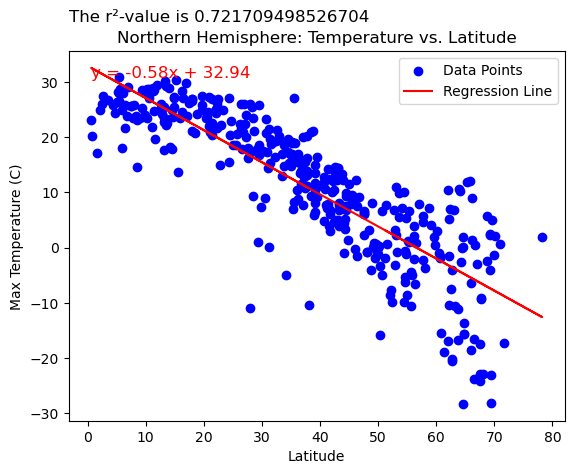

In [28]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Max Temperature (C)")

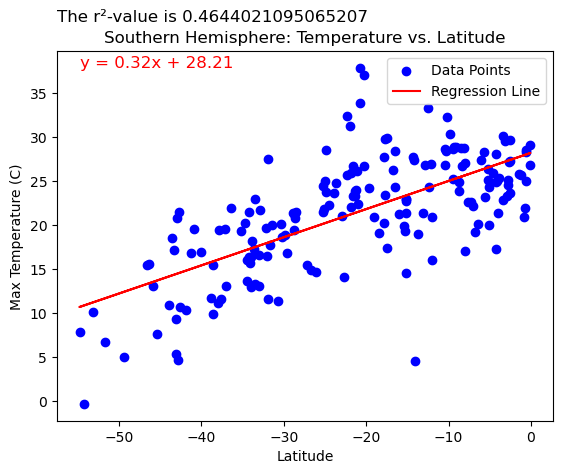

In [29]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Max Temperature (C)")

**Discussion about the linear relationship:** Something that suprised me in comparing the Latitude vs. Max Temperature, was that the r^2 value in the Northern Hemisphere was a better fit than in the Southern Hemisphere. Northern was approx .73 while the Southern Hemisphere was approx .58. I did not calculate the sample size for each, that may contribute to the r^2 values that resulted. Note: (R^2 values may be different because of different random sampling each run)

### Humidity vs. Latitude Linear Regression Plot

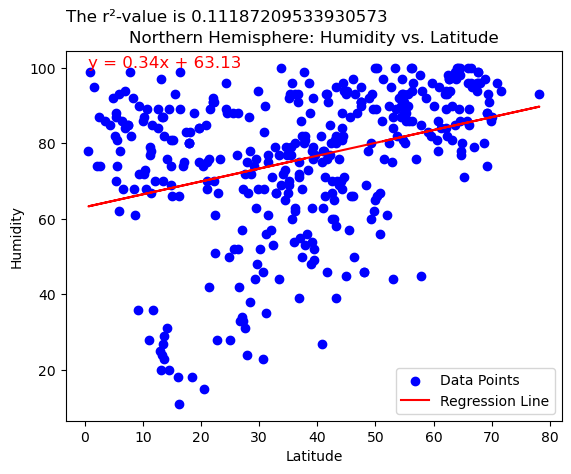

In [32]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", "Humidity")

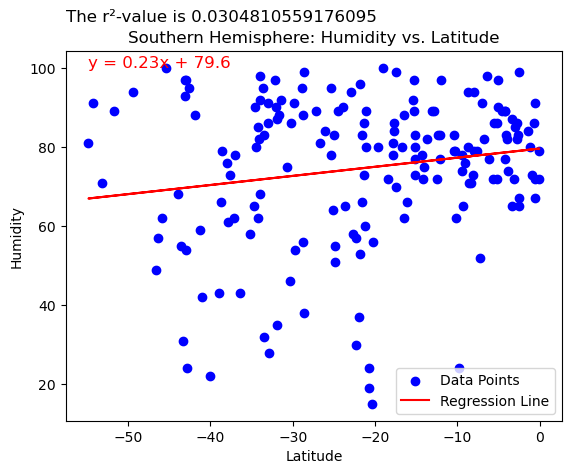

In [33]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", "Humidity")

**Discussion about the linear relationship:** The linear regression scatterplots comparing Latitude vs Humidity do not show a very good relationship between the two variables. There is a  very slight correlation that Humidity levels go up as the Latitude gets closer to 0. Northern Hemisphere is about 2 times better, (South r^ = approx .04 vs North r^2 = approx .08). Again the variation between random samples may be a reason why. Either way there is not much of a correlation. Note: (R^2 values may be different because of different random sampling each run)

### Cloudiness vs. Latitude Linear Regression Plot

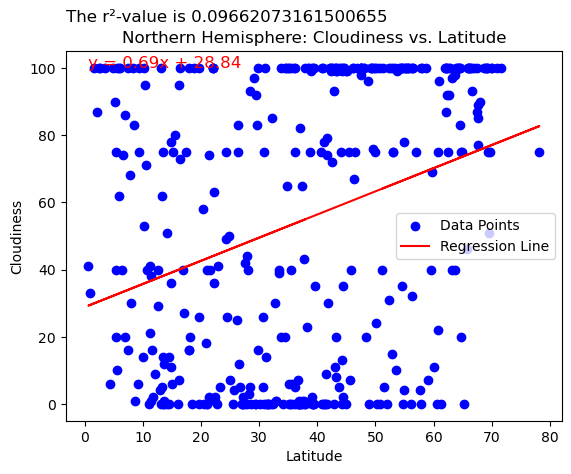

In [36]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Cloudiness")

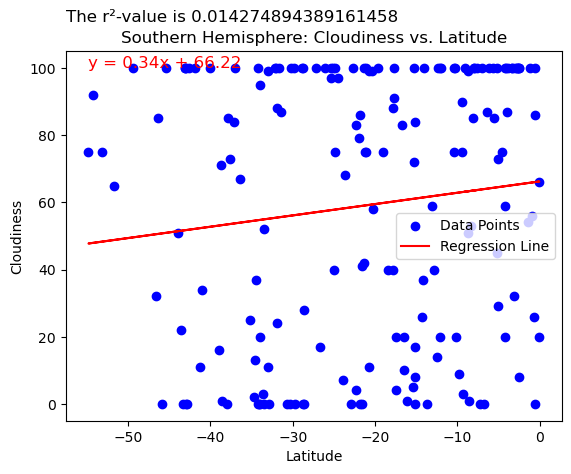

In [37]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Cloudiness")

**Discussion about the linear relationship:** This scatterplot of Latitude vs Cloudiness is very poor. While r^2 values are similiar to the Latitude vs Humidity, the Latitude vs Cloudiness r^2 (Northern = approx .07 vs Southern = approx .02), Data Points are varied to each extreme of cloudiness not matter the Latitude. Note:(R^2 values may be different because of different random sampling each run)

### Wind Speed vs. Latitude Linear Regression Plot

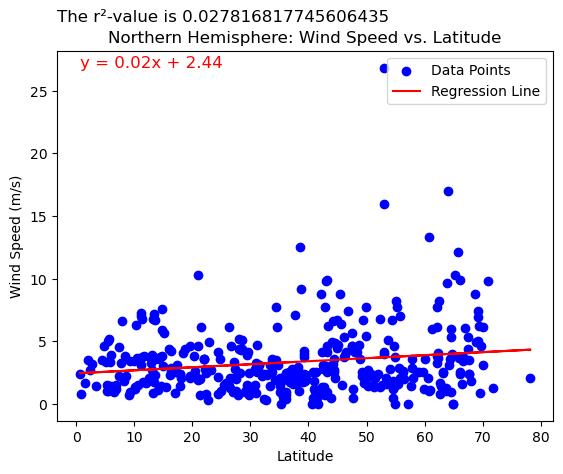

In [40]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Wind Speed (m/s)")

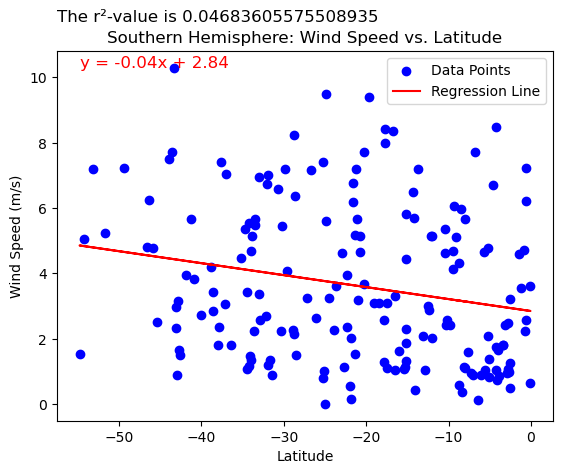

In [41]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** Latitude vs Wind Speed has virtually zero correlation based on r^2 and the scatterplow. The southern hemisphere is slightly better but still very very poor at best. The r^2 for Northern vs Southern were (.01 vs .05). Note: (R^2 values may be different because of different random sampling each run)